Description: This program uses an artifical recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price

# Import Libraries

In [54]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


#### Get the stock Quote

In [55]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-12-17', end='2020-12-22')

#Show the Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-17,18.571428,17.901072,18.176071,18.529642,757607200.0,16.126562
2012-12-18,19.103571,18.580357,18.750000,19.067858,625685200.0,16.594978
2012-12-19,19.060715,18.767857,18.981071,18.796785,449369200.0,16.359056
2012-12-20,18.935715,18.531429,18.928572,18.633215,481689600.0,16.216698
2012-12-21,18.559643,18.222857,18.302500,18.547501,596268400.0,16.142099
...,...,...,...,...,...,...
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.879997
2020-12-16,128.369995,126.559998,127.410004,127.809998,98208600.0,127.809998
2020-12-17,129.580002,128.039993,128.899994,128.699997,94359800.0,128.699997


Now we can see a dataframe with Apple stock information. You may notice that the start date does not start on January 1st, it starts on January 3rd. That's because there must have been no recording of the stock on January 1st 2012 or January 2nd 2012 due to New Year Eve. Most likely the stock market was closed for those 2 days. 

#### Get the number of rows and columns in the dataset

In [56]:
df.shape

(2018, 6)

#### Visualize the closing price history

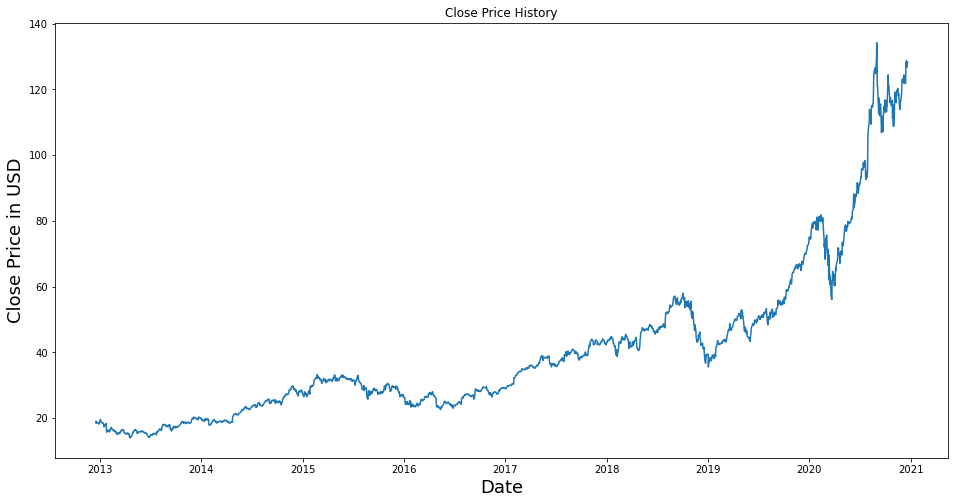

In [57]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize=18)
plt.show()

We're noticing a trend that Apple stock price has been increasing over the years. This is not financial advice, this is just an observation that We're seeing right now. 

#### Creating a dataframe with only the 'Close' Column

In [58]:
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset= data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* 0.8)

We're scaling the data because in practice we nearly always advantageous to apply pre-processing or in this case normalization to the input data before it is presented to a neural network.


#### Scale the data

In [59]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

We succesfully created a scaler object. So let's transform our data to be values between 0 and 1 now.

In [60]:
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03811068],
       [0.04258714],
       [0.04033257],
       ...,
       [0.95442167],
       [0.9374546 ],
       [0.95051257]])

Now we can see that the value in our dataset are between 0 and 1. 

#### Create the training dataset

In [61]:
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :] #All column

#Split the data into x_train and y_train datasets
x_train = [] #Independent training variables / features
y_train = [] #Dependent variables / target variables

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #Not including i
    y_train.append(train_data[i,0]) #the remaining data
    
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.03811068, 0.04258714, 0.04033257, 0.03897212, 0.03825921,
       0.03850872, 0.03637892, 0.03699083, 0.035366  , 0.04207324,
       0.04708139, 0.04502289, 0.04053753, 0.0396167 , 0.04003553,
       0.0375968 , 0.03950084, 0.03854735, 0.03303719, 0.02833499,
       0.03432634, 0.03331344, 0.03251736, 0.03393425, 0.03667894,
       0.01781369, 0.0146591 , 0.01761468, 0.02012172, 0.01969399,
       0.01929595, 0.01874047, 0.01538388, 0.019994  , 0.01984845,
       0.02307731, 0.02508533, 0.0265557 , 0.02298226, 0.02271789,
       0.02259313, 0.02068314, 0.02063265, 0.01732358, 0.01649483,
       0.01790578, 0.01552646, 0.01735923, 0.01605223, 0.01511061,
       0.01186392, 0.00876872, 0.01206293, 0.01043514, 0.01189659,
       0.01223522, 0.01406204, 0.01125795, 0.01123418, 0.01246691])]
[0.01578192383381724]



Now we see here the values of x_train and y_train.

#### Convert the x_train and y_train to numpy arrays

In [62]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape


(1555, 60)

the x_train is 2D array. But the LSTM Model is expecting 3D array. so We need to reshape the data.

#### Reshape the data

In [63]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1555, 60, 1)

No we can see the array is 3D.

#### Build the LSTM Model

In [64]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25)) #Neuron is 25
model.add(Dense(1))

#### Compile the model

In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### Train the model

In [66]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1555/1555 [==============================] - 33s 21ms/step - loss: 2.7962e-04


#### Create the testing dataset

In [67]:
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:, :]


#### Create the datasets x_test and y_test

In [68]:
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test

[array([0.24365294, 0.24627285, 0.24648079, 0.2476036 , 0.2440272 ,
        0.24781155, 0.24964135, 0.24897595, 0.24687587, 0.24267566,
        0.24352819, 0.2559832 , 0.26016262, 0.26182607, 0.26602625,
        0.27099578, 0.27494648, 0.27184831, 0.27523758, 0.28964715,
        0.28124677, 0.27644358, 0.27238891, 0.27588216, 0.27640199,
        0.27895953, 0.28164185, 0.28742231, 0.29018779, 0.29089475,
        0.29361863, 0.30006449, 0.29881689, 0.3011457 , 0.29767327,
        0.29750692, 0.29825547, 0.29829707, 0.30636478, 0.30788266,
        0.30927579, 0.31540974, 0.31474437, 0.31083527, 0.30879756,
        0.30944214, 0.30124968, 0.32173084, 0.31888217, 0.32428838,
        0.31748904, 0.30580336, 0.30588652, 0.30135365, 0.29399289,
        0.27016407, 0.27627724, 0.28097645, 0.27922984, 0.27698419]),
 array([0.24627285, 0.24648079, 0.2476036 , 0.2440272 , 0.24781155,
        0.24964135, 0.24897595, 0.24687587, 0.24267566, 0.24352819,
        0.2559832 , 0.26016262, 0.26182607, 0.

#### Convert the data to a numpy array

In [69]:
x_test = np.array(x_test)
x_test

array([[0.24365294, 0.24627285, 0.24648079, ..., 0.28097645, 0.27922984,
        0.27698419],
       [0.24627285, 0.24648079, 0.2476036 , ..., 0.27922984, 0.27698419,
        0.26469549],
       [0.24648079, 0.2476036 , 0.2440272 , ..., 0.27698419, 0.26469549,
        0.27199387],
       ...,
       [0.77493613, 0.78408506, 0.81785295, ..., 0.89686653, 0.94760156,
        0.94701935],
       [0.78408506, 0.81785295, 0.8401431 , ..., 0.94760156, 0.94701935,
        0.95442167],
       [0.81785295, 0.8401431 , 0.8329071 , ..., 0.94701935, 0.95442167,
        0.9374546 ]])

#### Reshape the data (2D to 3D)

In [70]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
x_test

array([[[0.24365294],
        [0.24627285],
        [0.24648079],
        ...,
        [0.28097645],
        [0.27922984],
        [0.27698419]],

       [[0.24627285],
        [0.24648079],
        [0.2476036 ],
        ...,
        [0.27922984],
        [0.27698419],
        [0.26469549]],

       [[0.24648079],
        [0.2476036 ],
        [0.2440272 ],
        ...,
        [0.27698419],
        [0.26469549],
        [0.27199387]],

       ...,

       [[0.77493613],
        [0.78408506],
        [0.81785295],
        ...,
        [0.89686653],
        [0.94760156],
        [0.94701935]],

       [[0.78408506],
        [0.81785295],
        [0.8401431 ],
        ...,
        [0.94760156],
        [0.94701935],
        [0.95442167]],

       [[0.81785295],
        [0.8401431 ],
        [0.8329071 ],
        ...,
        [0.94701935],
        [0.95442167],
        [0.9374546 ]]])

#### Get the models predicted price values

In [71]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Unscaling, original value
predictions

array([[ 48.845417],
       [ 48.389023],
       [ 48.042526],
       [ 47.68461 ],
       [ 47.27816 ],
       [ 46.874775],
       [ 46.49777 ],
       [ 46.15333 ],
       [ 45.889183],
       [ 45.607227],
       [ 45.300777],
       [ 45.188217],
       [ 45.263397],
       [ 45.498802],
       [ 45.92385 ],
       [ 46.46347 ],
       [ 47.062023],
       [ 47.60613 ],
       [ 48.06054 ],
       [ 48.37896 ],
       [ 48.62358 ],
       [ 48.926613],
       [ 49.20691 ],
       [ 49.48818 ],
       [ 49.718636],
       [ 49.89205 ],
       [ 49.934044],
       [ 50.021744],
       [ 50.118683],
       [ 50.159958],
       [ 50.26919 ],
       [ 50.43145 ],
       [ 50.6489  ],
       [ 50.864883],
       [ 50.940674],
       [ 50.972546],
       [ 51.032146],
       [ 51.05751 ],
       [ 51.10645 ],
       [ 51.213737],
       [ 51.318504],
       [ 51.37943 ],
       [ 51.47558 ],
       [ 51.493008],
       [ 51.59798 ],
       [ 51.777706],
       [ 51.970436],
       [ 52.1

#### Evalute the model, Get the Root Mean Squared Error (RMSE)

In [72]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.784485364966002

It means the prediction were exact and perfect. Exactly as they were supposed to be from the testing data. The values in those datasets match up

#### Plot the data

<ipython-input-73-8f6e781944d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


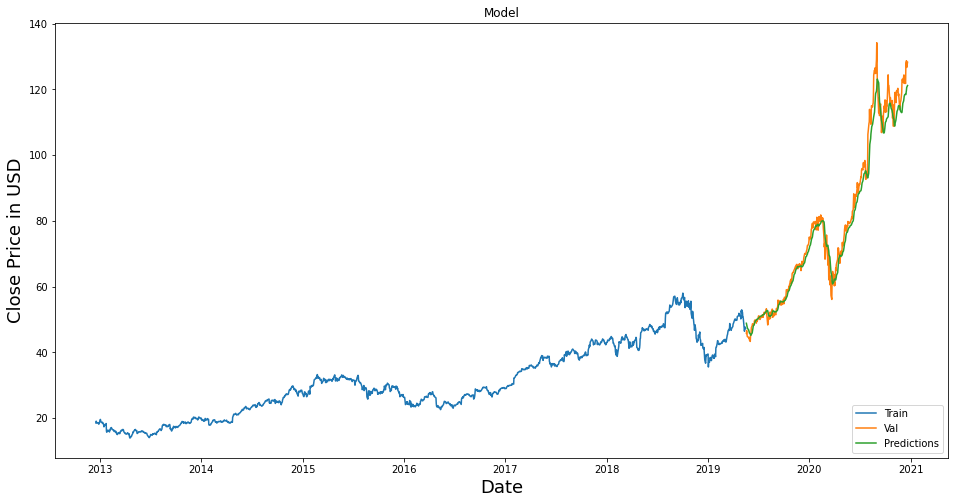

In [73]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

As we can see they are really close. It looks like our model is pretty decent. 

#### Show the valid and predicted prices

In [74]:
valid

,Close,Predictions
Date,,
2019-05-20,45.772499,48.845417
2019-05-21,46.650002,48.389023
2019-05-22,45.695000,48.042526
2019-05-23,44.915001,47.684608
2019-05-24,44.742500,47.278160
...,...,...
2020-12-15,127.879997,118.405945
2020-12-16,127.809998,118.975975
2020-12-17,128.699997,119.729263


#### Get the quote

In [75]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-01')

#### Create a new dataframe

In [76]:
new_df = apple_quote.filter(['Close'])
new_df

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765715
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2020-12-15,127.879997
2020-12-16,127.809998
2020-12-17,128.699997


#### Get the last 60 day closing price values and convert the dataframe to an array

In [77]:
last_60_days = new_df[-60:].values

#### Scale the data top be values between 0 and 1

In [78]:
last_60_days_scaled = scaler.transform(last_60_days)

#### Create an empty list

In [79]:
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#### Convert the X_test dataset to a numpy array

In [80]:
X_test = np.array(X_test)

#### Reshape the data

In [81]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

#### Get the predicted scaled price

In [82]:
pred_price = model.predict(X_test)
pred_price

array([[0.896183]], dtype=float32)

#### Undo the scaling

In [83]:
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[121.69782]], dtype=float32)

This will be the close price at January 1st 2021 (approximately $121.70)